<p style="background-color: darkviolet; font-family: newtimeroman; font-size: 300%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Flowers CNN Projects</b>

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn
    
import cv2      
from tqdm import tqdm                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [2]:
pwd

'C:\\Users\\defne\\Desktop\\Project\\DL_Flowers_Project'

In [3]:
my_data= 'flowers'

In [4]:
os.listdir(my_data) 

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [5]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'


In [6]:
data_folder = r'C:\Users\defne\Desktop\Project\DL_Flowers_Project\flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)

    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)  

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)

In [7]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## Visualizations

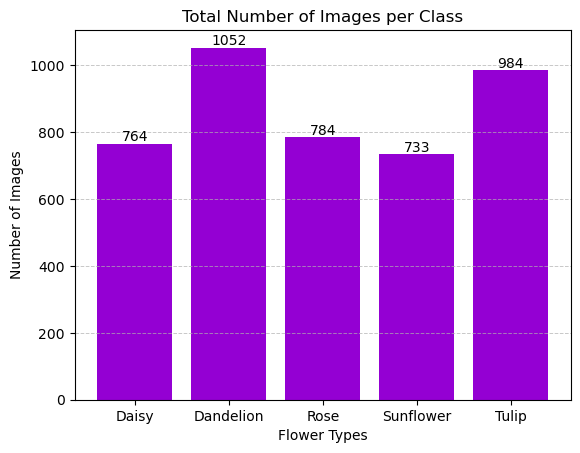

In [8]:
import os
import matplotlib.pyplot as plt

classes = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

data_dir = r'C:\Users\defne\Desktop\Project\DL_Flowers_Project\flowers'

total_counts = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)

plt.bar(classes, total_counts, color='darkviolet')
plt.xlabel('Flower Types')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class')
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

for i, count in enumerate(total_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

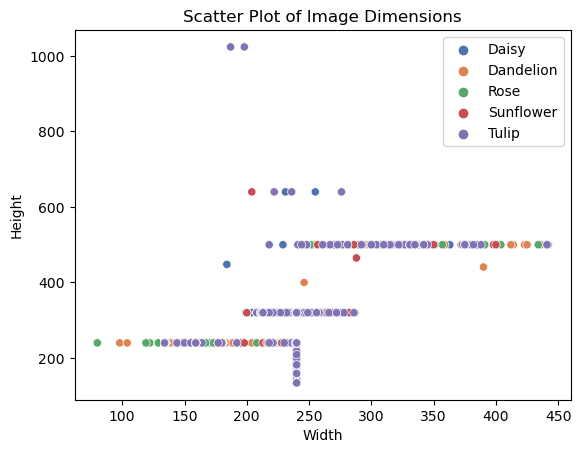

In [9]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)

sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [10]:
print(np.mean(x), np.mean(y))

252.77723059096175 337.50608342989574


In [11]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"

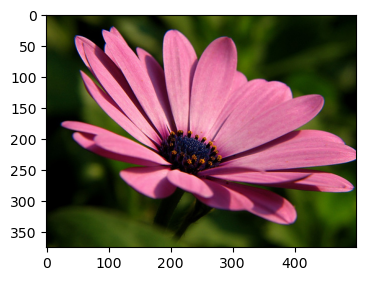

In [12]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [13]:
flower_img.max()

255

In [14]:
flower_img.min()

0

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [16]:
flower_img.shape

(375, 500, 3)

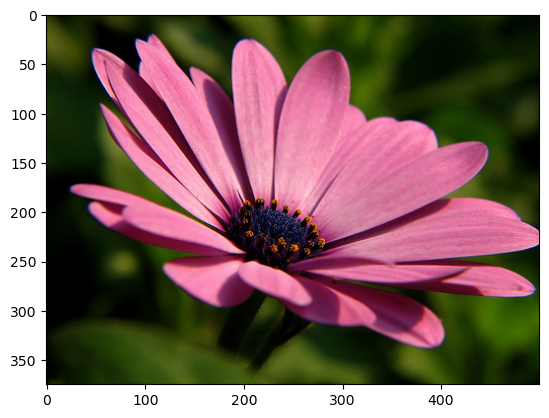

In [17]:
plt.imshow(flower_img)

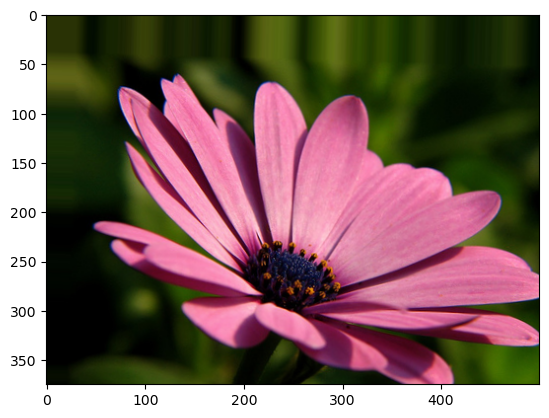

In [18]:
plt.imshow(flower_gen.random_transform(flower_img))

# Creating the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [20]:
from tensorflow.keras.layers import BatchNormalization

In [43]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,
                                                
                                               target_size=(224,224),
                                                
                                               color_mode='rgb',
                                                
                                               batch_size=batch_size,
                                                
                                               class_mode='sparse', shuffle=True)

Found 3452 images belonging to 5 classes.


In [44]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),
                                                   
                                                   color_mode='rgb',
                                                   
                                                   batch_size=batch_size,
                                                   
                                                   class_mode='sparse', shuffle=True)

Found 865 images belonging to 5 classes.


# ResNet152

In [39]:
image_shape = (224, 224, 3)  

resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=image_shape,
                                                   pooling='avg',
                                                   weights="imagenet")
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)

resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(5, activation='softmax')) 

resnet_model.compile(loss='sparse_categorical_crossentropy', 
                     optimizer='adam',
                     metrics=['accuracy'])

In [40]:
resnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ ?                           │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,370,944 (222.67 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 58,370,944 (222.67 MB)

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# restore_best_weights eğitimin erken durdurulması durumunda, modelin ağırlıkları, 
# izlenen metriğin en iyi değerini verdiği anda kaydedilen ağırlıklarla değiştirilir.
# Loss degeri belirli bir noktadan sonra artmaya baslayip model durursa, bu parametre sayesinde loss degerinin en dusuk oldugu skorla degistirir.

In [45]:
history_resnet152 = resnet_model.fit(train_flower_gen,epochs=10,
                    validation_data=test_flower_gen,
                    callbacks=[early_stop])

Epoch 1/10


C:\Users\defne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 566s 5s/step - accuracy: 0.2933 - loss: 1.5943 - val_accuracy: 0.2382 - val_loss: 4.6733
Epoch 2/10
 62/108 ━━━━━━━━━━━━━━━━━━━━ 3:58 5s/step - accuracy: 0.3708 - loss: 1.4745

KeyboardInterrupt: 

In [ ]:
summary = pd.DataFrame(resnet_model.history.history)
summary.head()

In [ ]:
resnet_model.evaluate(test_flower_gen)

# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
vgg16_model = Sequential()

pretrained_model = VGG16(include_top=False, 
                         input_shape=image_shape, 
                         pooling='avg', 
                         weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

vgg16_model.add(pretrained_model)

vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dense(5, activation='softmax'))  

vgg16_model.compile(loss='sparse_categorical_crossentropy', 
                    optimizer='adam',
                    metrics=['accuracy'])

vgg16_model.summary()

In [ ]:
history_vgg16 = vgg16_model.fit(
    train_flower_gen, 
    epochs=10,        
    validation_data=test_flower_gen, 
    callbacks=[early_stop]  
)

In [ ]:
summary = pd.DataFrame(vgg16_model.history.history)
summary.head()

In [ ]:
vgg16_model.evaluate(test_flower_gen)

# ConvNeXt Tiny

In [ ]:
import tensorflow_hub as hub

model_url = "https://tfhub.dev/sayakpaul/convnext_tiny_1k_224_fe/1"

pretrained_model = Sequential([
    hub.KerasLayer(model_url, trainable=False, input_shape=(224, 224, 3))
])

convnext_tiny_model = Sequential(pretrained_model)

convnext_tiny_model.add(Dense(128, activation='relu'))
convnext_tiny_model.add(Dense(5, activation='softmax')) 

convnext_tiny_model.compile(optimizer='adam', 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

convnext_tiny_model.summary()

In [ ]:
history_convnext_tiny = convnext_tiny_model.fit(
    train_flower_gen, 
    epochs=10, 
    validation_data=test_flower_gen,  
    callbacks=[early_stop] 
)

In [ ]:
summary = pd.DataFrame(convnext_tiny_model.history.history)
summary.head()

In [ ]:
convnext_tiny_model.evaluate(test_flower_gen)

# Xception

In [ ]:
xception_base = tf.keras.applications.Xception(
    include_top=False, 
    weights='imagenet',
    input_shape=(299, 299, 3)  
)

xception_base.trainable = False

xception_model = Sequential([
    xception_base,
    GlobalAveragePooling2D(),  
    Dense(128, activation='relu'),  
    Dense(5, activation='softmax') 
])

xception_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
xception_model.summary()

In [ ]:
history_xception = xception_model.fit(
    train_flower_gen, 
    epochs=10,        
    validation_data=test_flower_gen,  
    callbacks=[early_stop]
)

In [ ]:
summary = pd.DataFrame(xception_model.history.history)
summary.head()

In [ ]:
xception_model.evaluate(test_flower_gen)

# EfficientNetV2-S

In [ ]:
from tensorflow.keras.applications import EfficientNetV2S

efficientnet_v2s = EfficientNetV2S(include_top=False, 
                                   weights='imagenet', 
                                   input_shape=(224, 224, 3))

efficientnet_v2s.trainable = False

efficientnet_v2s_model = Sequential([
    efficientnet_v2s,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  
])

efficientnet_v2s_model.compile(optimizer='adam', 
                               loss='sparse_categorical_crossentropy', 
                               metrics=['accuracy'])

efficientnet_v2s_model.summary()

In [ ]:
history_efficientnetv2_s = efficientnet_v2s_model.fit(
    train_generator,  
    epochs=10,        
    validation_data=validation_generator,  
    callbacks=[early_stop]  
)

In [ ]:
summary = pd.DataFrame(efficientnet_v2s_model.history.history)
summary.head()

In [ ]:
efficientnet_v2s_model.evaluate(test_flower_gen)

# Model Performance 

In [ ]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title='Model Performance'):
    epochs = range(1, len(history.history['accuracy']) + 1)
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_model_performance(history_resnet152, 'ResNet152')

plot_model_performance(history_vgg16, 'VGG16')

plot_model_performance(history_convnext_tiny, 'ConvNeXt Tiny')

plot_model_performance(history_xception, 'Xception')

plot_model_performance(history_efficientnetv2_s, 'EfficientNetV2-S')

# Final Model

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(test_image_gen)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict(test_image_gen)

In [ ]:
pred_probabilities

In [ ]:
test_image_gen.classes

In [ ]:
pred_probabilities

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
test_image_gen.classes

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

In [ ]:
confusion_matrix(test_image_gen.classes,predictions)

In [ ]:
from tensorflow.keras.saving import save_model

save_model(model, 'flowers_model.keras')

# Predicting on an Image

In [ ]:
train_image_gen.class_indices

In [ ]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Modeli yükleyin
model = tf.keras.models.load_model('flowers_model.keras')

image = Image.open('C:\Users\defne\Desktop\Project\DL_Flowers_Project\tulip.jpg')
image = image.resize((224, 224))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)

predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)